# Arctic Amplification Use Case

## Purpose

Over the past three to four decades, the Arctic’s temperature has risen about twice the global average (AMAP 2017). The Svalbard and Barents region is experiencing the fastest temperature increases within the circumpolar Arctic (Isaksen et al. 2016), along with the highest rate of sea ice loss (AMAP 2017). In the Arctic Ocean the sea ice loss has been largest during summer (e.g. Comiso, 2012). In contrast, the sea ice cover in Svalbard region and Barents Sea has experienced a larger decline during winter. Compared to the other seasons, the most dramatic ice loss near Svalbard has occurred in winter. The location of Svalbard, presently at the border between a temperate Atlantic and a cold Arctic climate, makes it a hotspot for study the mechanisms of Arctic amplification, and how climate changes may influence the interactions between ocean,atmosphere and cryosphere.

A number of feedback mechanisms, some of them unique to the Arctic, are responsible for the more rapid warming observed over the Arctic compared with the rest of the world. These feedbacks amplify warming well beyond the effects caused by increasing greenhouse gas concentrations alone (AMAP 2017). The most known comes from changes in surface reflectivity due to the melting of snow and ice. As reflective surfaces are replaced by darker surfaces such as open water or land, less energy is radiated back to space and the region warms further, leading to still more melting.

The Svalbard region experience more open water beyond the expected autumn period. This cause strong feedbacks that to a large extent slow the formation of ice in autumn causing an increase in open water fraction even in winter. The open-water fraction plays a significant but as yet poorly defined role in the observed increase in exchange of heat and moisture within the atmospheric boundary layer. In addition, more broken sea-ice cover (with leads and polynyas) further affects the thermodynamics of the atmospheric boundary layer and the cumulative effect on boundary-layer temperatures is large when an air mass travels a long distance over a broken sea-ice cover (AMAP 2017). Studies have shoved (e.g. Tetzlaff et al. (2013)) that a major part of the variance of 2-m temperature of air masses arriving land areas around Arctic Ocean is explained by the surface temperature distribution along the air mass trajectory.

Studies in Canada have shown that cyclones have a strong impact on heat exchange across the ocean-ice atmosphere interface into the boundary layer (Raddatz et al.,2014) and that once this ocean heat has entered the boundary layer it can be advected over large distances affecting regional heat and moisture fluxes (Raddatz et al., 2012). The impacts of a more mobile ice cover thus play an important role in both how the atmospheric boundary layer evolves as well as how it scales up to affect regional processes from what are very locally generated points of flux (AMAP 2017).

This use case is focused on the Svalbard region which is located in the Arctic hotspot and the ambition is to achieve a detailed impression of the recent warming pattern and how this is related to the variations in sea ice. The time period examined is 1979 until today. 

## Requirements

Technical requirements include
- matplotlib
- cartopy
- shapely (not used now)
- numpy
- matplotlib
- datetime

If not installed use conda or pip to establish environment.

This is developed for Python3.

## Area of interest

Add a map that is showing the area of interest, i.e. where we are working.

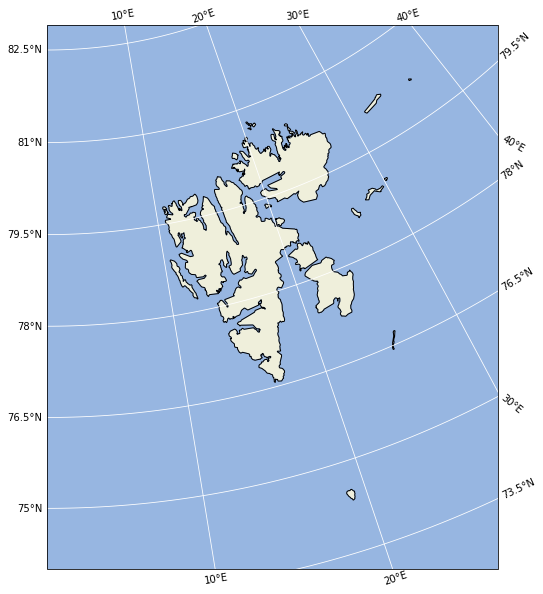

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon
import cartopy
import numpy as np
import matplotlib.patches as mpatches
#import cartopy.io.img_tiles as cimgt

myprojection = ccrs.NorthPolarStereo(central_longitude=0,true_scale_latitude=60)
myprojection = ccrs.Stereographic(central_longitude=0,central_latitude=60.)
#myprojection = ccrs.PlateCarree()
#myprojection = ccrs.AzimuthalEquidistant(central_longitude=0,central_latitude=60.)
#stamen_terrain = cimgt.Stamen('terrain-background')
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=myprojection)
ax.set_extent([0,28,74,82])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(color='white',draw_labels=True, y_inline=False)
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[10,75],width=10,height=2,facecolor="yellow",alpha=0.5,transform=myprojection))
# Code below should create a rectangular box in the map, but it doesn't work with NorthPolarStereo, only other types of projections.
# lats = np.array([73,78,78,75])
#lons = np.array([5,5,25,25])
#mypoly = np.zeros((len(lats),2),np.float64)
#mypoly[:,0] = lons
#mypoly[:,1] = lats
#p = mpatches.Polygon(mypoly,closed=True,ec='white',fill=True,fc="white", transform=myprojection)
#ax.add_patch(p)
#lats = [76,78,78,76]
#lons = [10,10,25,25]
#myring = LinearRing(list(zip(lons,lats)))
#myring = Polygon((
#    (10.,75.),
#    (10.,78.),
#    (30.,78.)
#    (25.,75.)
#))
#ax.add_geometries([myring],crs=myprojection, facecolor="white", edgecolor="black", alpha=0.5)

## Retrieve time series data

The input data used are daily and monthly observations of air temperature and sea ice concentration.

### Observed air temperature

Find and retrieve daily and monthly air temperatures for the time period 1979 until today for the stations SN99710 - Bjørnøya, SN99720 - Hopen, SN99840 - Svalbard lufthavn, and SN99910 - Ny-Ålesund. (Better use the existing NetCDF files and create daily and monthly values directly). 

The NetCDF files available lack proper identification of missing values. Thus filtering is required until this is in place.

In [2]:
weatherstations = {
    'Bjørnøya': {
        'stid':'SN99710',
        'url':'https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99710.nc'
    },
    'Hopen': {
        'stid':'SN99720',
        'url':'https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99720.nc'
    },
    'Svalbard lufthavn': {
        'stid':'SN99840',
        'url':'https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99840.nc'
    },
    'Ny-Ålesund': {
        'stid':'SN99910',
        'url':'https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99910.nc'
    }
}

In [3]:
import xarray as xr
air_temperature_2m = dict()
i = 0
for item in weatherstations:
    print('Processing data from: ',item)
    print('\t',weatherstations[item]['url'])
    print('\t',weatherstations[item]['stid'])
    mykey = weatherstations[item]['stid']
    rawdata = xr.load_dataset(weatherstations[item]['url'])
    tmp = rawdata['air_temperature_2m'].where(rawdata['time.year']>=1979,drop=True)
    air_temperature_2m[mykey] = tmp.where(tmp<300)
    i += 1

Processing data from:  Bjørnøya
	 https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99710.nc
	 SN99710
Processing data from:  Hopen
	 https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99720.nc
	 SN99720
Processing data from:  Svalbard lufthavn
	 https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99840.nc
	 SN99840
Processing data from:  Ny-Ålesund
	 https://thredds.met.no/thredds/dodsC/met.no/observations/stations/SN99910.nc
	 SN99910


Show what we have now...

In [4]:
air_temperature_2m

{'SN99710': <xarray.DataArray 'air_temperature_2m' (time: 281940)>
 array([266.05, 267.25, 266.95, ...,    nan,    nan,    nan], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1979-01-01 ... 2021-03-25T19:00:00
 Attributes:
     long_name:              Air temperature
     coverage_content_type:  coordinate
     standard_name:          air_temperature
     units:                  K
     _ChunkSizes:            1024,
 'SN99720': <xarray.DataArray 'air_temperature_2m' (time: 145089)>
 array([260.55, 255.85, 252.15, ..., 276.55, 276.35, 276.65], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1979-01-01 ... 2019-09-03T09:00:00
 Attributes:
     long_name:              Air temperature
     coverage_content_type:  coordinate
     standard_name:          air_temperature
     units:                  K
     _ChunkSizes:            1020,
 'SN99840': <xarray.DataArray 'air_temperature_2m' (time: 392156)>
 array([260.05, 258.55, 250.95, ...,    nan,    nan,    n

Combine stations into a 2D array that is used for plotting.

In [16]:
tmp = xr.concat([air_temperature_2m[s] for s in air_temperature_2m.keys()], dim='stations')

In [33]:
tmp = tmp.assign_coords(stations=("stations", list(air_temperature_2m.keys())))

In [34]:
tmp

<xarray.DataArray 'air_temperature_2m' (stations: 4, time: 483542)>
array([[266.05, 267.25, 266.95, ...,    nan,    nan,    nan],
       [260.55, 255.85, 252.15, ...,    nan,    nan,    nan],
       [260.05, 258.55, 250.95, ...,    nan,    nan,    nan],
       [   nan, 258.15, 251.65, ...,    nan,    nan,    nan]],
      dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-01 ... 2021-03-25T19:00:00
  * stations  (stations) <U7 'SN99710' 'SN99720' 'SN99840' 'SN99910'
Attributes:
    long_name:              Air temperature
    coverage_content_type:  coordinate
    standard_name:          air_temperature
    units:                  K
    _ChunkSizes:            1024

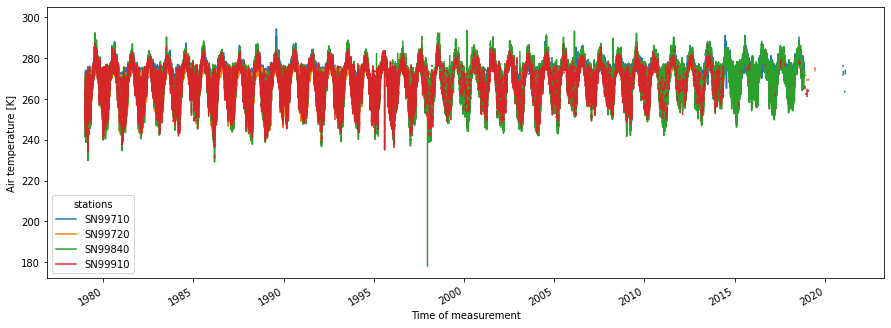

In [35]:
fig = plt.figure(figsize=(15,5))
tmp.plot.line(x='time')

**Apparently some filtering of input data is still necessary.**

In [40]:
tmp['air_temperature_2m']

KeyError: 'air_temperature_2m'

**Create monthly means**

In [36]:
import numpy as np
from datetime import datetime
deftime = datetime.min.time()
mymat = np.empty((len(air_temperature_2m.keys()),365*50))
i = 0
for item in air_temperature_2m.keys():
    print('Processing:', item)
    mygroup = air_temperature_2m[item].time.dt.strftime("%Y-%m")
    mymean = air_temperature_2m[item].groupby(mygroup).mean()
    mytimes = [datetime.strptime(mydate, "%Y-%m").date() for mydate in np.unique(mygroup.values)]
    mytimes = [datetime.combine(mydate,deftime) for mydate in np.unique(mytimes)]
    if i == 0:
        mymat = np.array([2, mymean.values], dtype=object)
    else:
        tmp = np.append(mymat, mymean.values, axis=1)
    mymat = tmp
    #myarray = xr.DataArray(mymean.values,coords=[mytimes])
    i += 1

Processing: SN99710
Processing: SN99720


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
mygroup = air_temperature_2m['SN99910'].time.dt.strftime("%Y-%m")

In [ ]:
np.empty((5,10))
365*50

In [174]:
mymean = air_temperature_2m['SN99910'].groupby(mygroup).mean()

In [221]:
from datetime import datetime
mymean.values
#mytimes = datetime.datetime.strptime(mygroup,"%Y-%m")
deftime = datetime.min.time()
mytimes = [datetime.strptime(mydate, "%Y-%m").date() for mydate in np.unique(mygroup.values)]
mytimes = [datetime.combine(mydate,deftime) for mydate in np.unique(mytimes)]

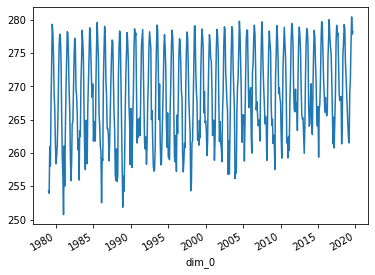

In [224]:
myarray = xr.DataArray(mymean.values,coords=[mytimes])
myarray.plot()

### Sea ice concentration

Find and retrieve sea ice indicator from https://cryo.met.no/en/sea-ice-index. Preferably the NetCDF file which has to be made public available and in the catalogue.

**This datafile has to be published online. Checking details with Thomas. Currently only in FTP-server, will check if volume is attached to THREDDS server so we have continous update.**

In [134]:
iceconcurl = "/disk1/data/cvl/osisaf_sval_sie_daily.nc"
iceconc = xr.load_dataset(iceconcurl)

In [135]:
iceconc

<xarray.Dataset>
Dimensions:        (nv: 2, time: 15417)
Coordinates:
  * time           (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2021-03-17
    sic_threshold  float32 0.15
    lat            float32 78.5
    lon            float32 20.0
Dimensions without coordinates: nv
Data variables:
    lat_bounds     (nv) float32 72.0 85.0
    lon_bounds     (nv) float32 0.0 40.0
    area           |S4 b'SVAL'
    sie            (time) float64 0.8091 0.8125 0.8159 ... 0.5506 0.5631 0.5569
    source         (time) float64 12.0 10.0 11.0 10.0 ... 30.0 30.0 30.0 30.0
Attributes:
    title:                   Daily Svalbard-NIS Sea Ice Extent from EUMETSAT ...
    product_id:              OSI-420
    product_name:            OSI SAF Sea Ice Index
    product_status:          demonstration
    version:                 v2p1
    summary:                 Time series of Daily Sea Ice Extent (SIE) for Sv...
    keywords:                Earth Science > Cryosphere > Sea Ice > Sea Ice E...
    keywords_vocabulary:     GCMD Science Keywords
    geospatial_lat_min:      72.0
    geospatial_lat_max:      85.0
    geospatial_lon_min:      0.0
    geospatial_lon_max:      40.0
    time_coverage_start:     1979-01-01T00:00:00Z
    time_coverage_end:       2021-03-17T00:00:00Z
    Conventions:             CF-1.7, ACDD-1.3
    history:                 2021-03-18T102210Z creation
    source:                  EUMETSAT OSI SAF Sea Ice Concentration V2 CDR (O...
    processing_level:        Climate Indicators derived from Sea Ice Concentr...
    date_created:            2021-03-18T102210Z
    creator_type:            institutions
    creator_institution:     Norwegian Meteorogical Institute
    creator_name:            Norwegian Meteorogical Institute
    creator_email:           info@met.no
    creator_url:             met.no
    institution:             Norwegian Meteorogical Institute
    publisher_name:          Norwegian Meteorogical Institute
    publisher_email:         info@met.no
    publisher_url:           met.no
    project:                 EUMETSAT OSI SAF
    distribution_statement:  Free
    copyright_statement:     Copyright 2021 EUMETSAT
    references:              Product User Manual for OSI-420, Lavergne et al....
    featureType:             timeSeries

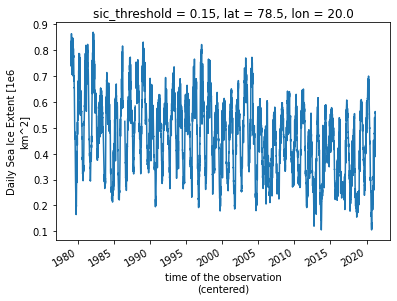

In [137]:
iceconc['sie'].plot()

## Plot timeseries

FIXME

## Final comments

FIXME